<h1>2014-2024 - Top 10 holdings of BGF World Technology A2</h1>
<h2>Stock Correlations and Retun Analysis with Equal Share Investment</h2>

<h3>Taking the top 10 holdings of the BFG World Technology A2 Fund as a study case, we seek to analyze historic stock prices from 1900 to 2020 to answer the following questions:</h3>
<ul>
  <li>What is the correlation between the top 10 stocks in this fund? can we consider investing in these stocks as low-risk in term of correlation?</li>
  <li>If we decided to invest in these stocks at the beginning of the year 2010, how much are the total commulative return after 10 years in 2020?</li>
</ul>  

<h4>What is the correlation between the top 10 stocks in this fund? can we consider investing in these stocks as low-risk in term of correlation?</h4>

<p>We start by importing the needed packages for this notebook</p>

In [1]:
from datetime import datetime, timedelta
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
import math

<p>We then declare the top 10 stock holdings in this fund along with their share weight in this stock</p>
<p>Since the fund manager blackrock does only annonce the top 10 holdings in these stocks among around 75 other stocks in this fund, we assume that there is only these 10 stocks in the fund</p>
<p>You can see more information about this fund by visiting <strong><a href="https://blackrock.com/no/intermediaries/products/230010/blackrock-world-technology-a2-usd-fund">BGF World Technology Fund</a></strong></p>

In [2]:
fund = {
    "NVDA": 0.1,
    "MSFT": 0.1,
    "AAPL": 0.1,
    "AVGO": 0.1,
    "CDNS": 0.1,
    "META": 0.1,
    "AMD": 0.1,
    "ASML.AS": 0.1,
    "AMZN": 0.1,
    "MA": 0.1,
}
stocks = list(fund.keys())
stock_weights = list(fund.values())
start_day = "1980-01-01"
end_day = "2021-01-01"

print("Targeted stocks: ", stocks)
print("Stock Weights: ", stock_weights)
print(f"Analysis from {start_day} to {end_day}")

Targeted stocks:  ['NVDA', 'MSFT', 'AAPL', 'AVGO', 'CDNS', 'META', 'AMD', 'ASML.AS', 'AMZN', 'MA']
Stock Weights:  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Analysis from 1980-01-01 to 2021-01-01


In [3]:
data = yf.download(" ".join(stocks), start=start_day, end=end_day)

[*********************100%%**********************]  10 of 10 completed


In [4]:
# The daily close price of each stock.
close_prices = data['Close']

# The daily percentage change in each stock.
percentage_change = close_prices.pct_change(fill_method=None)

# The daily cumulative_returns from each stock.
cumulative_returns = (percentage_change +1).cumprod()

# Total daily total cumulative returns of all stocks.
total_returns = (percentage_change * stock_weights).sum(axis = 1)
total_cumulative_returns = (total_returns + 1).cumprod() 

<p>In order to minimize risk in our portfolio we need stocks that are least correlated to each other as possible. So at first we start by calculating the correlations between our the prices of out chosen stocks</p>

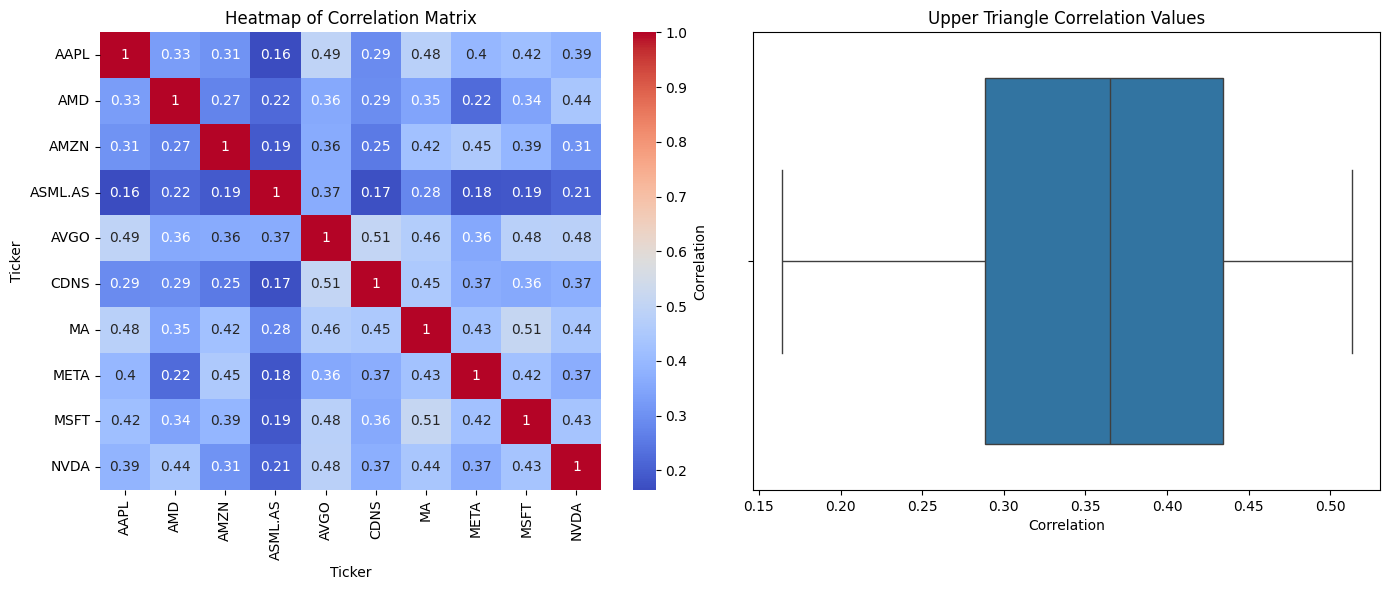

In [5]:
# Invastigating correlation between stocks
correlation_df = percentage_change.corr()

# Convert the DataFrame to a NumPy array
correlation_matrix = correlation_df.values

# Extract the upper triangle of the correlation matrix, excluding the diagonal
upper_triangle_indices = np.triu_indices_from(correlation_matrix, k=1)
correlations_upper_triangle = correlation_matrix[upper_triangle_indices]

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the heatmap of the original correlation matrix
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Heatmap of Correlation Matrix')

# Plot the box plot of the unique upper triangle correlation values
sns.boxplot(x=correlations_upper_triangle, ax=axes[1])
axes[1].set_title('Upper Triangle Correlation Values')
axes[1].set_xlabel('Correlation')

# Adjust layout
plt.tight_layout()
plt.show()

<p>Looking at our correlation matrix and box plot of these correlation values, we notice the following:</p>
<ul>
  <li>The correlation values are spreading from around 0.15 to 0.50</li>
  <li>The 25% percentile is at 0.28</li>
  <li>The 75% percentile is at 0.44</li>
  <li>The median(50% percentile) is at 0.36</li>
</ul>  
<strong>The fact that 50 % of the correlations are below 0.36, and 75% are below 0.44, with 25% of the correlations between 0.44 and 0.5 tells us that the total correlation between these stocks is low enough to be able to contribute for minimizing the risk of investing in this portfolio.</strong>

<p>Now that we have invastigated the correlation between the top 10 stocks in this portfolio, we can plot an overview of the following:</p>
<ul>
    <li>The actual daily close prices of each stock</li>
    <li>The daily percentage change in the close price of each stock</li>
    <li>The cumulative return from each stock</li>
    <li>The combined total cumulative return of all stocks</li>
</ul>

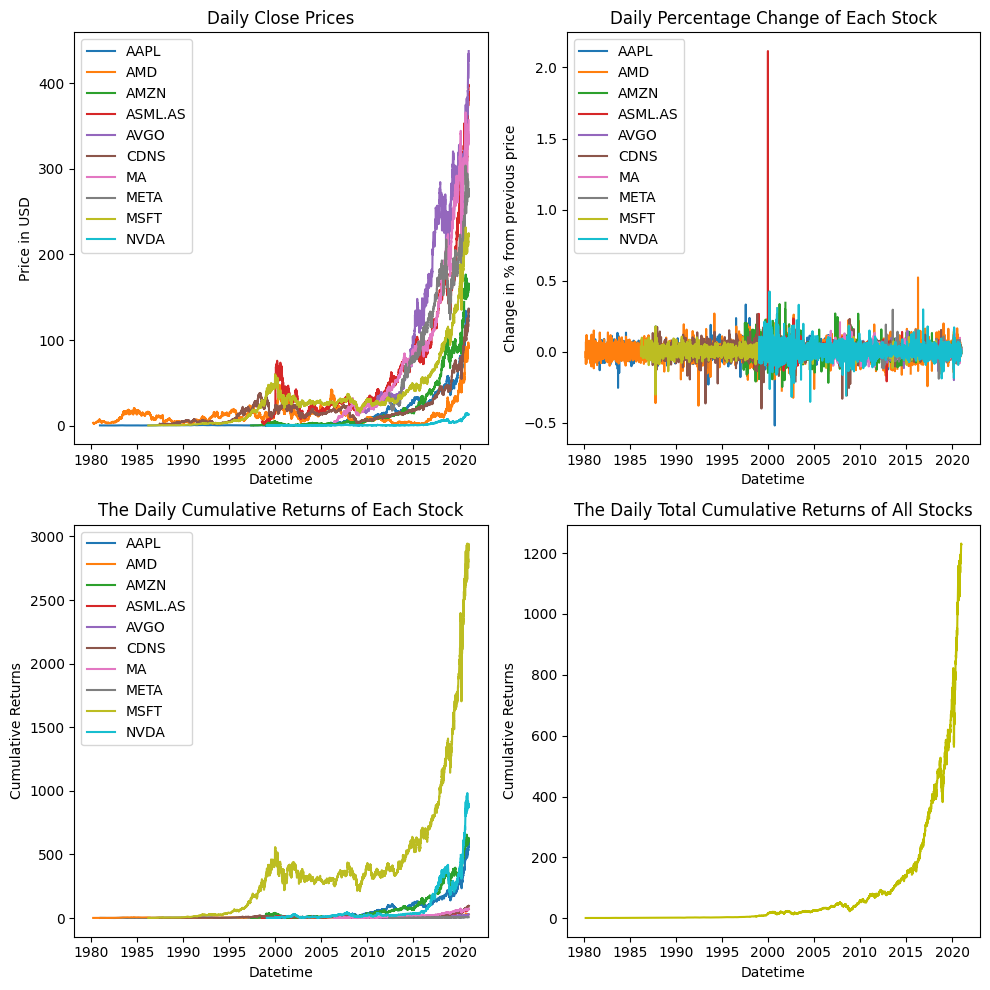

In [6]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# First subplot
axs[0, 0].plot(close_prices, label=close_prices.columns)
axs[0, 0].set_title('Daily Close Prices')
axs[0, 0].set_xlabel('Datetime')
axs[0, 0].set_ylabel('Price in USD')
axs[0, 0].legend(loc='upper left')

# Second subplot
axs[0, 1].plot(percentage_change, label=percentage_change.columns)
axs[0, 1].set_title('Daily Percentage Change of Each Stock')
axs[0, 1].set_xlabel('Datetime')
axs[0, 1].set_ylabel('Change in % from previous price')
axs[0, 1].legend(loc='upper left')

# Third subplot
axs[1, 0].plot(cumulative_returns, label=cumulative_returns.columns)
axs[1, 0].set_title('The Daily Cumulative Returns of Each Stock')
axs[1, 0].set_xlabel('Datetime')
axs[1, 0].set_ylabel('Cumulative Returns')
axs[1, 0].legend(loc='upper left')

# Fourth subplot
axs[1, 1].plot(total_cumulative_returns, 'y')
axs[1, 1].set_title('The Daily Total Cumulative Returns of All Stocks')
axs[1, 1].set_xlabel('Datetime')
axs[1, 1].set_ylabel('Cumulative Returns')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<p>Looking at the close prices of each stock we notice a steap increase of many stocks over the last 10 year period</p>
<p>The plot of the percentage change looks very crowded but with a clear indication of a high price of the stock ASML.AS in the year of 2000, however we can see from the plot of the close prices that the price decreases shortly after the year of 2000</p>
<p>Drawing the daily returns of each stock, we notice a high profitable MSFT(Microsoft) stock that casts its shadow on the total combined cumulative return, but we also notice some effect from the other stocks in shaping the curve of the total combined cumulative return starting from the year 2010 and forward</p>

<p>So far we have assumed that every stock has an equal share of 10% in our portfolio, but that is not necessary the optimal share that minimizes risk and opimizes profit, to find the optimal share we need to try different share distributions and calculate the sharpe ratio and volatility of each share distribution, this can be approched in 2 ways:</p>
<p>
<strong>1.</strong> Trying every possible combination of the 10 stocks, which means that we need to calculate the number of needed permutations, which is given by the mathematical formula for the binomial coefficient \(\binom{n+k-1}{k-1}\) and yields to 4263421511271 need permutations, and since this number of iterations is hard even for modern computing power, we need to a solution that finds a compromise between the number of permutations and comuputing power needed. <br /><strong>below you can see how we calculated the high number of needed permutations using the math.comb() method.</strong>
</p>

In [7]:
# Calculate the binomial coefficient
n = 100 + len(stocks) -1
k = len(stocks) -1
binomial_coefficient = math.comb(n, k)
print(f"The number of needed permutations is: {binomial_coefficient}")

The number of needed permutations is: 4263421511271


<p>
    <strong>2.</strong> The solution is to run a loop for as many iterations as possible and in each iteration a random combination of stock weights is tried, then the stock weights with best sharpe ratio and volatility is picked out to represent our optimal stock weights.<br /> In this analysis, we run the optimization job with halv a million iterations, but before that lower number of iterations has been tried and it seems like the sharpe ratio converges to around 1.01 just before this number of iterations so more iterations would be unnecessary.
</p>

In [8]:
# Optimizing the stocks weights of this portfolio
p_weights, p_returns, p_risk, p_sharpe = [], [], [], []

count = 500000
for k in range(0, count):
   wts = np.random.uniform(size = len(percentage_change.columns))
   wts = wts/np.sum(wts)
   p_weights.append(wts)
    
   mean_ret = (percentage_change.mean() * wts).sum()*252
   p_returns.append(mean_ret)
    
   ret = (percentage_change * wts).sum(axis = 1)
   annual_std = np.std(ret) * np.sqrt(252)
   p_risk.append(annual_std)
    
   sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
   p_sharpe.append(sharpe)

max_ind = np.argmax(p_sharpe)

print("The maximum sharpe ratio: ", p_sharpe[max_ind])

optimal_stock_weights = pd.Series(p_weights[max_ind], index=percentage_change.columns)

print("The optimal stocks weights:")
print(optimal_stock_weights)

The maximum sharpe ratio:  1.0102875066552592
The optimal stocks weights:
Ticker
AAPL       0.089018
AMD        0.008438
AMZN       0.086617
ASML.AS    0.055804
AVGO       0.185942
CDNS       0.025164
MA         0.102318
META       0.152398
MSFT       0.216346
NVDA       0.077956
dtype: float64


<p>The optimization job gives us a sharpe ratio of a little over 1 which is considered and optimal sharpe ratio that reduces risk and increase return, but to look further into this we plot all tried permutations in an efficient frontier chart that shows the volatility of each tried random stocks weights on the x-axis, the return on the y-axis and is color coded to reflect the measured sharpe ratio based on a color bar.</p>

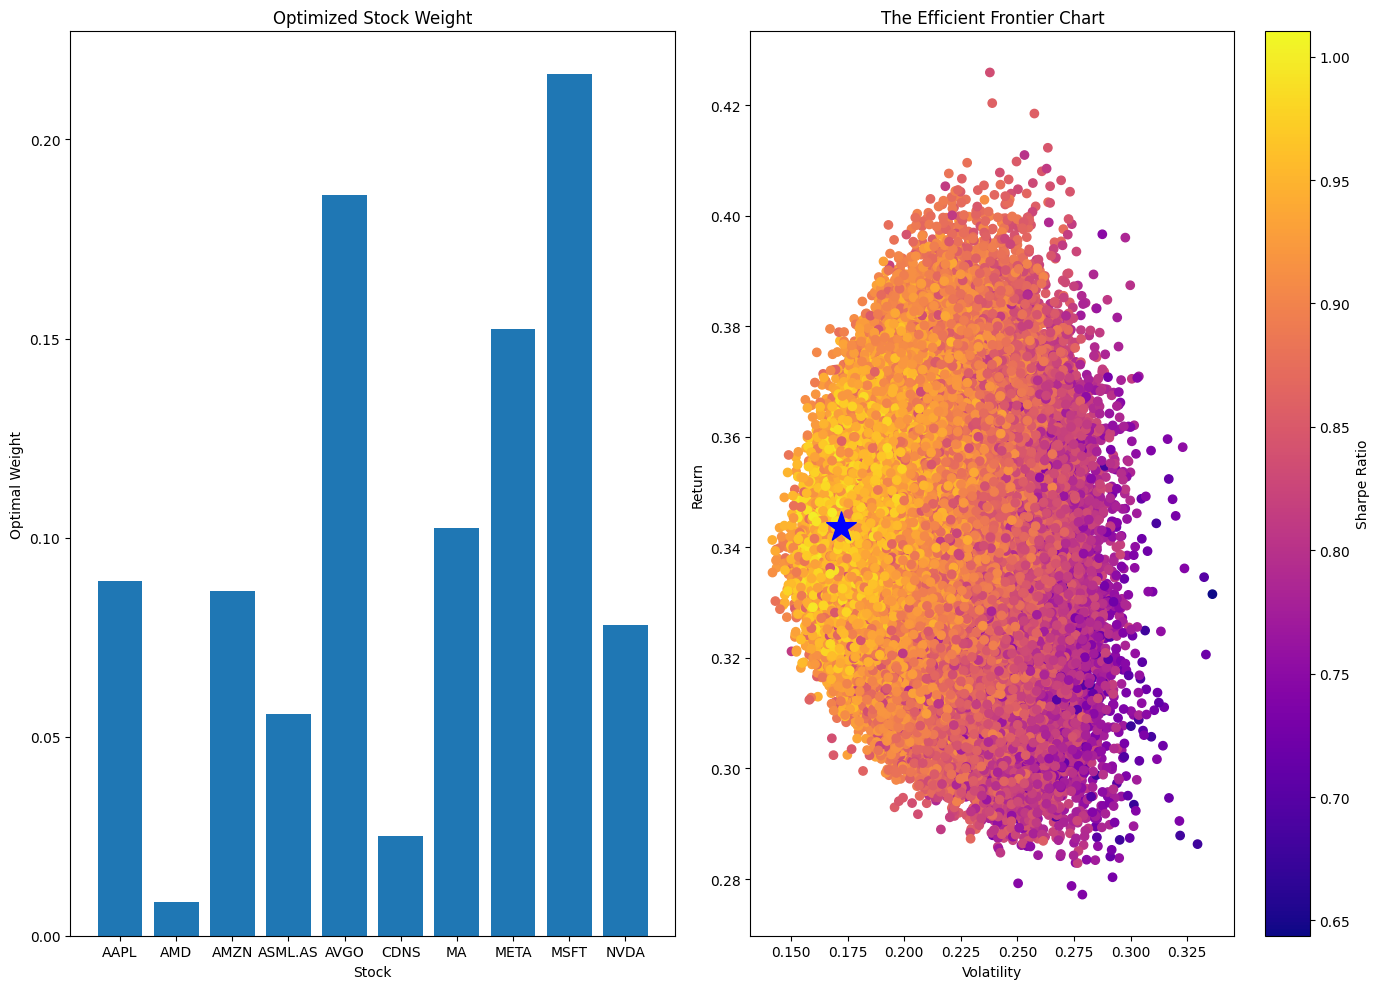

In [9]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

# First subplot
axs[0].bar(optimal_stock_weights.index.tolist(), optimal_stock_weights.tolist())
axs[0].set_title('Optimized Stock Weight')
axs[0].set_xlabel('Stock')
axs[0].set_ylabel('Optimal Weight')

# Second subplot
scatter = axs[1].scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
axs[1].set_title('The Efficient Frontier Chart')
axs[1].set_xlabel('Volatility')
axs[1].set_ylabel('Return')

# Add a colorbar to the scatter plot in the second subplot
cbar = fig.colorbar(scatter, ax=axs[1])
cbar.set_label('Sharpe Ratio')

# Show the most efficient portfolio with the best Sharpe ratio in the chart of the efficient frontier.
axs[1].scatter(p_risk[max_ind], p_returns[max_ind], color='b', marker='*', s=500)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<p>On the right of the subplots above, we see the optimal stock weights with sharpe ratio around 1.01, and volatility of about 0.175 marked with a blue start</p>
<p>An although this stock weight distribution is not the one that gives the most return, it is however the one that best minimized risk and finds a safe balance between risk and return based on the history of the studied stock close prices, and therefore it is the weight that a future investment in this stock should take into consideration.</p>
<p>Finnaly on the left side above, we see the optimal distribution of stock weights that sums up to 1(100%).</p>

<p>Next we want to compare the total cumulative returns from en equal weight investement in this stock with this optimal weight we just found in order to invastigate if our optimization job does improve the over all return from an investement</p>
<p>Since we optimized using close prices up to the year 2020, we can't use the same period to test our optimal solution. Therefore, we will test an investement that goes from the year 2021 up to and through the year 2023 (3 years period).</p>

[*********************100%%**********************]  10 of 10 completed


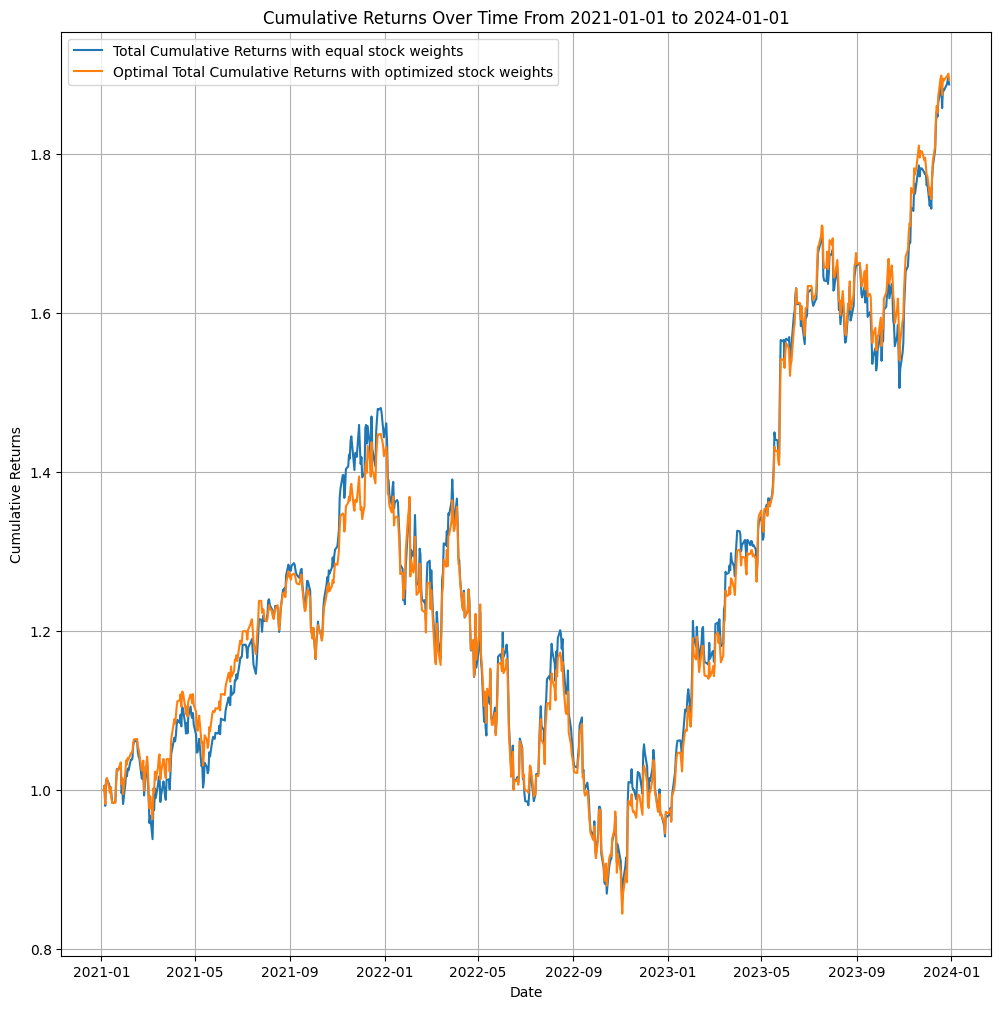

In [11]:
test_start_day = "2021-01-01"
test_end_day = "2024-01-01"
test_stocks = sorted(stocks)

test_data = yf.download(" ".join(test_stocks), start=test_start_day, end=test_end_day)

# The daily close price of each stock.
test_close_prices = test_data['Close']

# The daily percentage change in each stock.
test_percentage_change = test_close_prices.pct_change(fill_method=None)

# Total daily total cumulative returns of all stocks using equal stock shares.
test_total_returns = (test_percentage_change * stock_weights).sum(axis = 1)
test_total_cumulative_returns = (test_total_returns + 1).cumprod() 

# Total daily total cumulative returns of all stocks using optimized stock shares.
test_optimal_stock_weights_tickers = optimal_stock_weights.index.tolist()
test_optimal_stock_weights_values = optimal_stock_weights.tolist()
test_optimal_total_return = (test_percentage_change * test_optimal_stock_weights_values).sum(axis = 1)
test_optimal_total_cumulative_returns = (test_optimal_total_return + 1).cumprod() 

plt.figure(figsize=(12, 12))
plt.plot(test_total_cumulative_returns, label='Total Cumulative Returns with equal stock weights')
plt.plot(test_optimal_total_cumulative_returns, label='Optimal Total Cumulative Returns with optimized stock weights')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title(f'Cumulative Returns Over Time From {test_start_day} to {test_end_day}')
plt.legend()
plt.grid(True)
plt.show()